<a href="https://colab.research.google.com/github/MayoLJS/scotrail-delay-attribution-2025/blob/main/ScotRail_2025_Performance_Audit_A_Data_Driven_Analysis_of_Delay_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the file you uploaded to Colab
file_name = '/content/Scotrail/Table 3184 - Delay minutes by operator and cause (periodic).csv'

df_raw = pd.read_csv(file_name)

# Preview the data
df_raw.head()

,time period,train operating company name,NR on TOC External,NR on TOC Network Management Other,NR on TOC Non Track Assets,NR on TOC Severe Weather,NR on TOC Track,TOC on Self Fleet,TOC on Self Operations,TOC on Self Stations,TOC on Self TOC Other,TOC on Self Traincrew,TOC on TOC Fleet,TOC on TOC Operations,TOC on TOC Stations,TOC on TOC TOC Other,TOC on TOC Traincrew
0,Apr 2019 to Mar 2020 (Period 01),Avanti West Coast,6458.5,9379.7,4894.3,432.0,5191.0,4384.5,141.5,892.5,1434.0,386.5,3594.9,348.0,363.5,865.0,714.0
1,Apr 2019 to Mar 2020 (Period 02),Avanti West Coast,13273.0,5789.2,6546.6,1424.0,5990.0,2124.0,196.5,568.0,1234.5,743.2,4943.7,338.0,601.9,1287.5,1804.0
2,Apr 2019 to Mar 2020 (Period 03),Avanti West Coast,7063.0,13441.0,10550.5,1433.5,5058.0,5867.0,363.0,614.0,1296.0,658.5,4688.5,711.0,754.0,1765.5,3205.5
3,Apr 2019 to Mar 2020 (Period 04),Avanti West Coast,7102.0,7642.8,13243.5,1500.5,6272.0,4226.0,279.5,427.5,1048.5,585.0,4089.5,735.8,712.0,1789.0,3155.5
4,Apr 2019 to Mar 2020 (Period 05),Avanti West Coast,4798.0,6914.2,41323.5,17703.0,5373.0,8603.5,439.5,621.0,1050.0,1364.0,5583.5,720.0,1020.5,1430.5,2219.8


In [13]:
# Filter ScotRail
df_scotrail = df_raw[df_raw['train operating company name'] == 'ScotRail'].copy()

# Narrow down to 2025 data
df_2025 = df_scotrail[df_scotrail['time period'].str.contains('2025')].copy()

In [14]:
# Standardize column names: lowercase, remove parentheses
df_2025.columns = [
    col.lower()
    .replace('(', '')
    .replace(')', '')
    for col in df_2025.columns
]

In [15]:
# Reset index to keep it clean
df_2025 = df_2025.reset_index(drop=True)

# Check the results
df_2025.head()

,time period,train operating company name,nr on toc external,nr on toc network management other,nr on toc non track assets,nr on toc severe weather,nr on toc track,toc on self fleet,toc on self operations,toc on self stations,toc on self toc other,toc on self traincrew,toc on toc fleet,toc on toc operations,toc on toc stations,toc on toc toc other,toc on toc traincrew
0,Apr 2024 to Mar 2025 (Period 01),ScotRail,6569.3,7505.0,7895.5,11156.5,4119.3,6993.2,4313.5,1955.0,3206.0,4878.8,1831.0,450.0,243.0,333.0,660.0
1,Apr 2024 to Mar 2025 (Period 02),ScotRail,4779.7,8489.1,11755.3,8113.9,2182.4,7650.0,3905.5,2406.6,2852.5,4819.5,1560.0,711.5,122.0,480.5,300.5
2,Apr 2024 to Mar 2025 (Period 03),ScotRail,9952.0,9963.7,8652.3,3246.8,2889.5,9176.7,4659.5,2535.9,4248.2,4337.3,1436.5,428.5,417.0,615.0,1212.0
3,Apr 2024 to Mar 2025 (Period 04),ScotRail,6518.7,8517.1,7423.8,3524.6,1933.8,7118.9,4167.6,3432.9,4228.9,9164.9,1475.5,224.6,331.5,552.5,489.5
4,Apr 2024 to Mar 2025 (Period 05),ScotRail,5493.2,7326.5,4274.2,3237.9,1607.5,6257.7,5658.9,3326.9,3332.7,6486.5,674.0,165.5,201.0,465.5,535.0


In [16]:
# Extract the numeric Period (e.g., 'Period 04' -> 4), For numeric sorting
df_2025['period'] = df_2025['time period'].str.extract(r'\(Period (\d+)\)').astype(int)

# Extract the Financial Year string, without the brackets
df_2025['year'] = df_2025['time period'].str.split(r' \(').str[0]

# Sort the data chronologically by period
df_2025 = df_2025.sort_values(['year', 'period']).reset_index(drop=True)

# Drop time_period, we dont need it anymore
df_2025 = df_2025.drop(columns=['time period'])

# Preview
df_2025[['year', 'period']].head(10)

,year,period
0,Apr 2024 to Mar 2025,1
1,Apr 2024 to Mar 2025,2
2,Apr 2024 to Mar 2025,3
3,Apr 2024 to Mar 2025,4
4,Apr 2024 to Mar 2025,5
5,Apr 2024 to Mar 2025,6
6,Apr 2024 to Mar 2025,7
7,Apr 2024 to Mar 2025,8
8,Apr 2024 to Mar 2025,9
9,Apr 2024 to Mar 2025,10


In [17]:
# Lets 'unpivot'
id_vars = ['train operating company name', 'period', 'year']
value_vars = [col for col in df_2025.columns if col not in id_vars]

df_unpivot = df_2025.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='delay_cause',
    value_name='minutes'
)

# Clean the labels: replace underscores with spaces and capitalize words
# (e.g. 'nr_on_toc_track' becomes 'Nr On Toc Track')
df_unpivot['delay_cause'] = df_unpivot['delay_cause'].str.title()

# Final check of the cleaned, melted data
df_unpivot.head(10)

,train operating company name,period,year,delay_cause,minutes
0,ScotRail,1,Apr 2024 to Mar 2025,Nr On Toc External,6569.3
1,ScotRail,2,Apr 2024 to Mar 2025,Nr On Toc External,4779.7
2,ScotRail,3,Apr 2024 to Mar 2025,Nr On Toc External,9952.0
3,ScotRail,4,Apr 2024 to Mar 2025,Nr On Toc External,6518.7
4,ScotRail,5,Apr 2024 to Mar 2025,Nr On Toc External,5493.2
5,ScotRail,6,Apr 2024 to Mar 2025,Nr On Toc External,3963.6
6,ScotRail,7,Apr 2024 to Mar 2025,Nr On Toc External,5369.5
7,ScotRail,8,Apr 2024 to Mar 2025,Nr On Toc External,7634.5
8,ScotRail,9,Apr 2024 to Mar 2025,Nr On Toc External,8249.2
9,ScotRail,10,Apr 2024 to Mar 2025,Nr On Toc External,7145.0


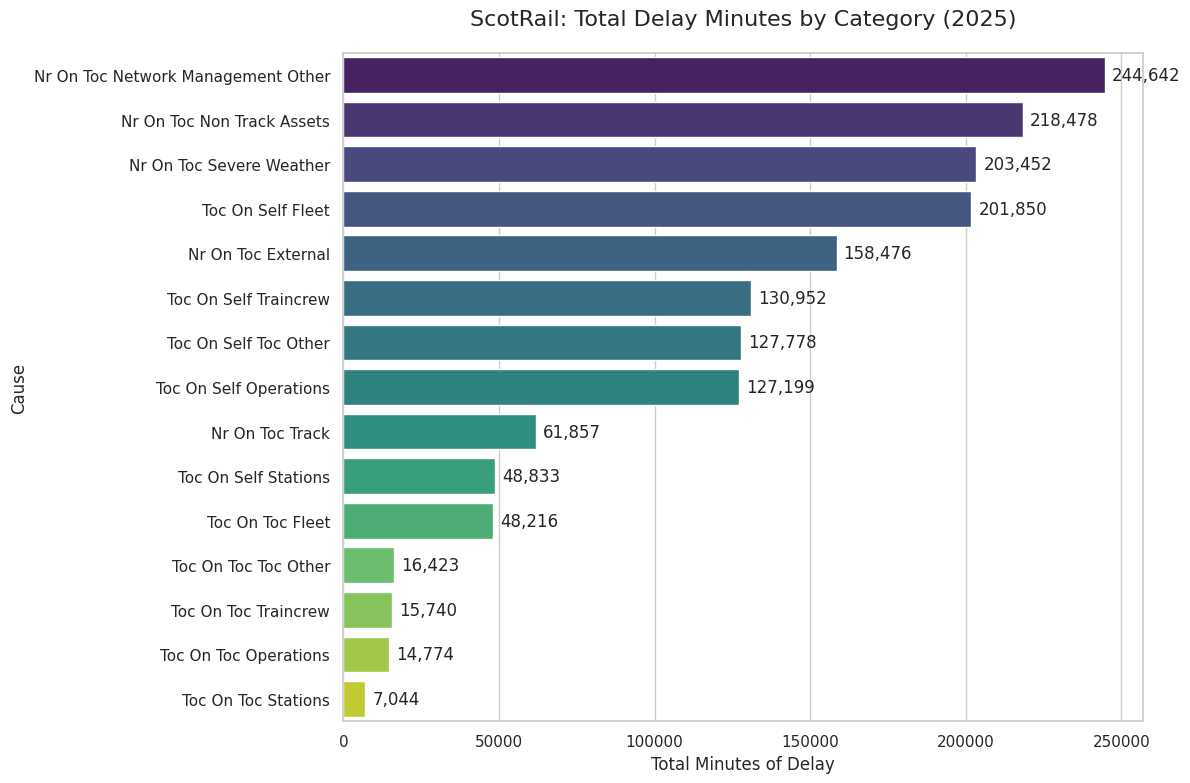

In [18]:
# TOP DELAY CAUSES

# Total delay minutes by cause
top_causes = df_unpivot.groupby('delay_cause')['minutes'].sum().sort_values(ascending=False).reset_index()

# Visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Bar Chart
ax = sns.barplot(
    data=top_causes,
    x='minutes',
    y='delay_cause',
    hue='delay_cause',
    palette='viridis',
    legend=False
)

# Labels
plt.title('ScotRail: Total Delay Minutes by Category (2025)', fontsize=16, pad=20)
plt.xlabel('Total Minutes of Delay', fontsize=12)
plt.ylabel('Cause', fontsize=12)

# Data Labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

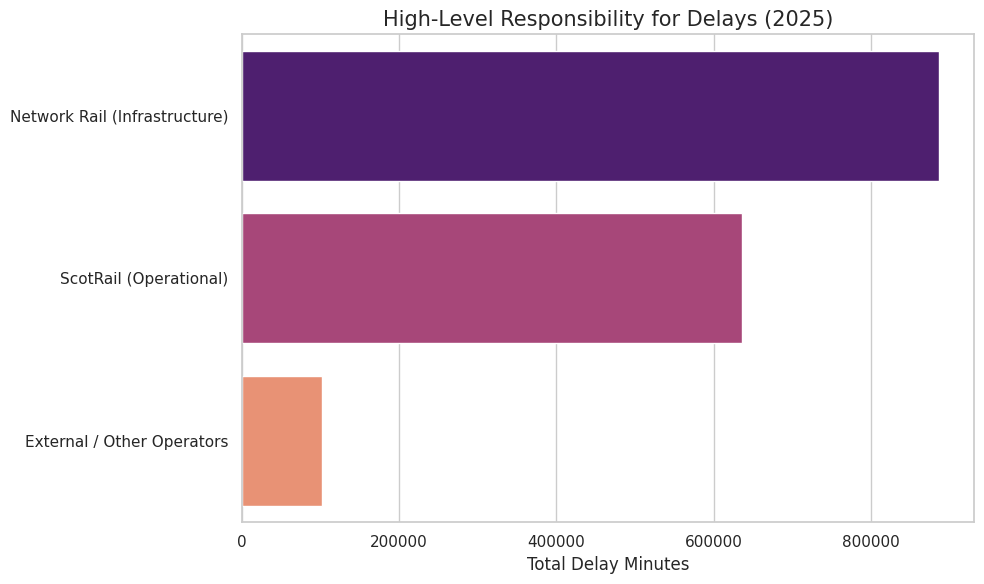

                  responsibility   minutes
0  Network Rail (Infrastructure)  886905.9
1         ScotRail (Operational)  636614.3
2     External / Other Operators  102199.0


In [19]:
# RESPONSIBILITY ANALYSIS

# If function to group responsibilities
def categorize_responsibility(cause):
    if 'Nr On' in cause:
        return 'Network Rail (Infrastructure)'
    elif 'Toc On Self' in cause:
        return 'ScotRail (Operational)'
    else:
        return 'External / Other Operators'

# Apply function to the dataframe
df_unpivot['responsibility'] = df_unpivot['delay_cause'].apply(categorize_responsibility)

# Aggregate responsibility
resp_summary = df_unpivot.groupby('responsibility')['minutes'].sum().sort_values(ascending=False).reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=resp_summary,
    x='minutes',
    y='responsibility',
    hue='responsibility',
    palette='magma',
    legend=False
)

plt.title('High-Level Responsibility for Delays (2025)', fontsize=15)
plt.xlabel('Total Delay Minutes')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Report
print(resp_summary)

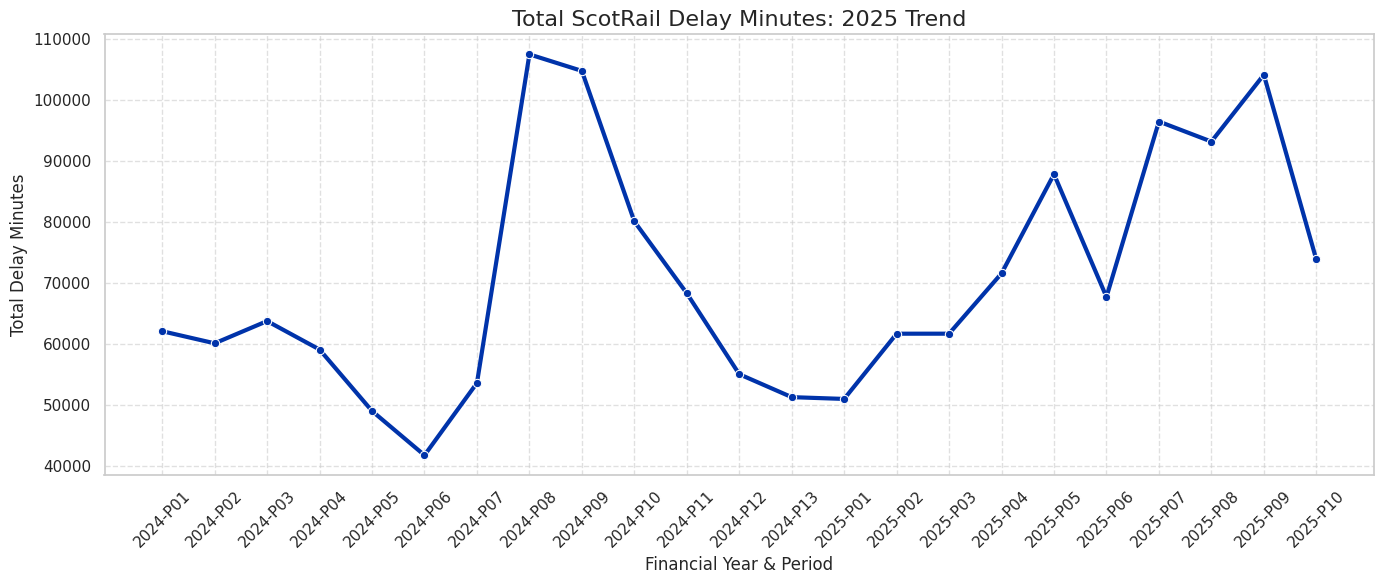

In [20]:
# TREND ANALYSIS

# Lets create a chronological 'Period_Label' (e.g., "2024-P01")
df_unpivot['period_label'] = df_unpivot['year'].str[4:8] + "-P" + df_unpivot['period'].astype(str).str.zfill(2)

# Total minutes per period
timeline = df_unpivot.groupby(['period_label'])['minutes'].sum().reset_index()

# Line chart
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=timeline,
    x='period_label',
    y='minutes',
    marker='o',
    linewidth=3,
    color='#0033aa' # ScotRail Blue
)

plt.title('Total ScotRail Delay Minutes: 2025 Trend', fontsize=16)
plt.xlabel('Financial Year & Period', fontsize=12)
plt.ylabel('Total Delay Minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Top 5 Causes of ScotRail Delays in 2025:
                          delay_cause   minutes
0  Nr On Toc Network Management Other  244642.0
1          Nr On Toc Non Track Assets  218478.3
2            Nr On Toc Severe Weather  203452.6
3                   Toc On Self Fleet  201850.7
4                  Nr On Toc External  158476.0


/tmp/ipython-input-612290328.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


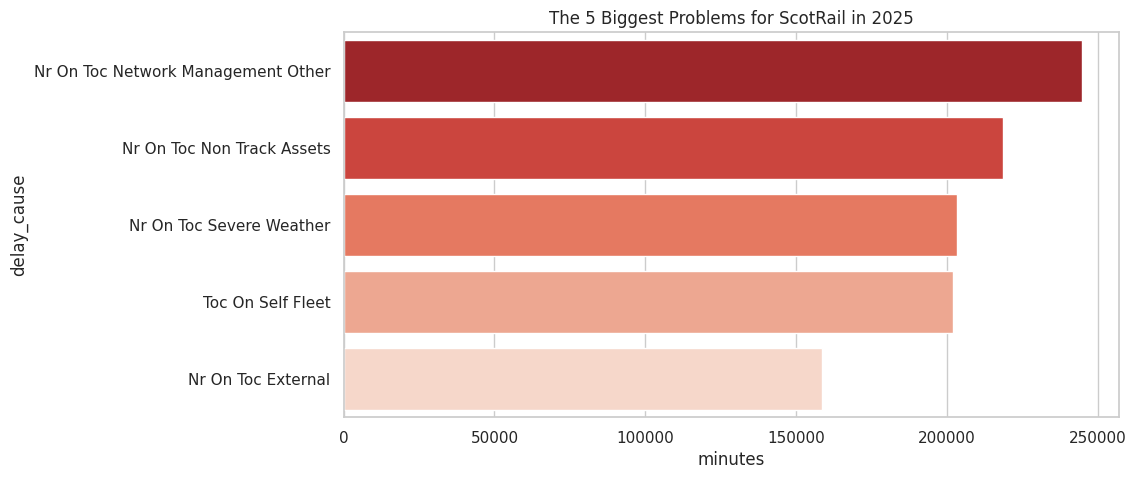

In [21]:
# MAIN ISSUES

# Sum up minutes for every cause
final_comparison = df_unpivot.groupby('delay_cause')['minutes'].sum().sort_values(ascending=False).reset_index()

# Top 5 to see the main issues
print("Top 5 Causes of ScotRail Delays in 2025:")
print(final_comparison.head(5))

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=final_comparison.head(5),
    x='minutes',
    y='delay_cause',
    palette='Reds_r'
)
plt.title('The 5 Biggest Problems for ScotRail in 2025')
plt.show()